In [ ]:
from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, C, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
train_dataset = Dataset()
template = Template() 

In [2]:
train_dataset.add_examples(
    [
        [
            R.node(C.A)[1], R.node(C.B)[2], R.node(C.C)[3],
            R.edge(C.A, C.B)[5], R.edge(C.B, C.A)[5], R.edge(C.A, C.C)[5], R.edge(C.C, C.A)[5]
        ]
    ]
)

train_dataset.add_queries([
    R.predict(C.A)
])

In [3]:
template += (R.predict(V.X) <= F.sum[ F.identity( F.avg( [R.node(V.Y)["w1": 1], R.edge(V.Y, V.X)["w2": 1]] ) ) ])


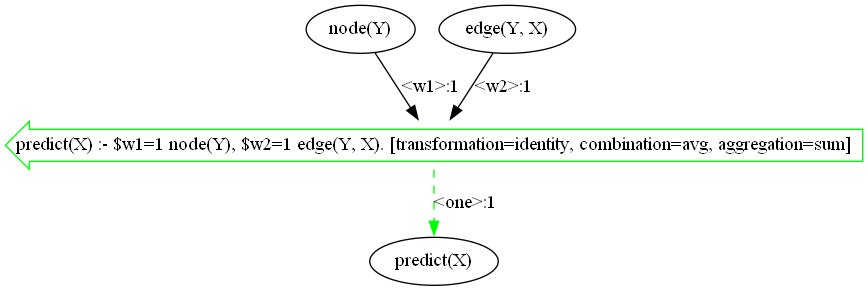

In [4]:
template.draw()

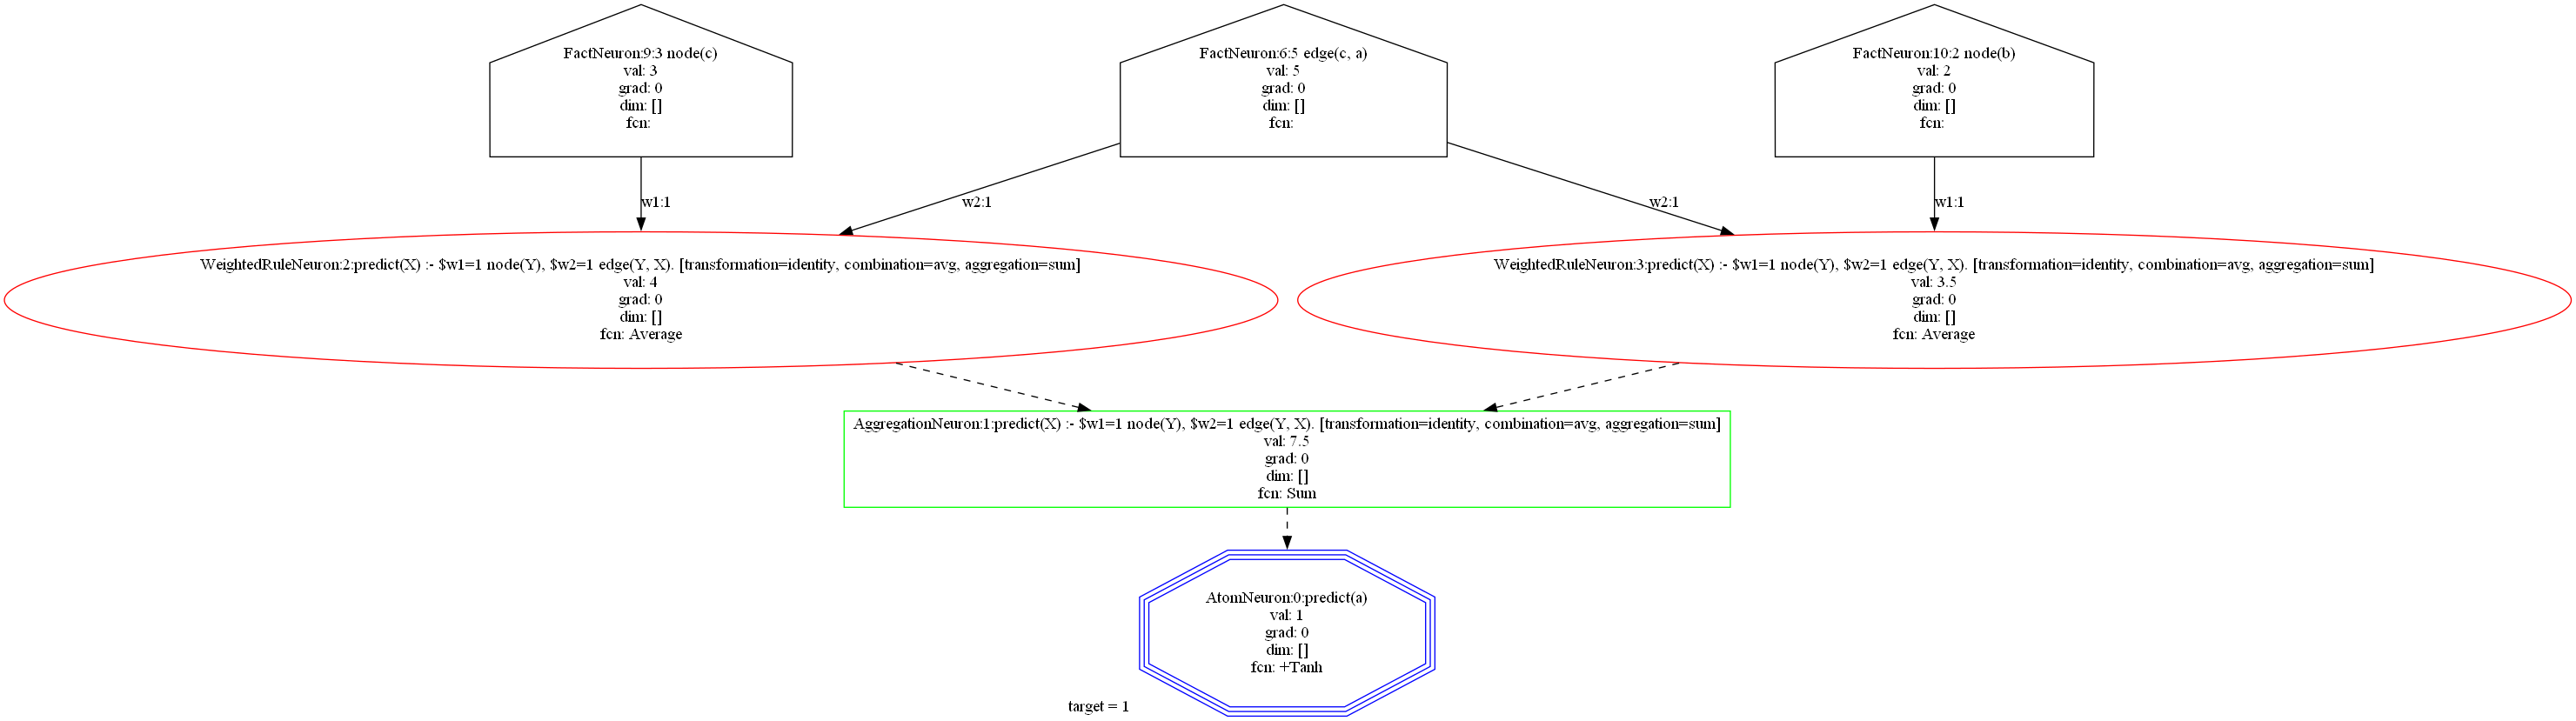

In [5]:
settings = Settings(optimizer=SGD(), epochs=1)

neuralogic_evaluator = get_evaluator(template, settings)

build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

build_dataset[0].draw()